# Git

## Introdução

Este caderno foi traduzido automaticamente para torná-lo acessível a mais pessoas, por favor me avise se você vir algum erro de digitação..

Git é um software de controle de versão criado por Linus Torvalds, que o criou para ter um bom controle de versão quando ele desenvolveu o kernel do Linux.

## As áreas idiota

Git tem três áreas, embora uma quarta também possa ser considerada.

!(https://maximofn.com/wp-content/uploads/2023/03/git-states.png)

 * O primeiro é nosso espaço de trabalho, aqui é onde temos todo nosso código. Aqui, quando modificamos ou criamos um arquivo, ele se torna desmarcado, portanto, temos que movê-lo para a área de "faseado".
 * A segunda área é a área "faseada". Aqui é onde os arquivos que modificamos ou criamos que não foram rastreados se tornam rastreados, ou seja, os rastreia. Aqui nós enviaremos os arquivos para a próxima área de "cabeçalho".
 * A terceira área é a área "cabeça". Aqui gravamos uma versão de nosso código. Desta forma, ao salvar versões, podemos voltar às versões passadas, se necessário. A versão gravada de nosso código pode ser enviada a um servidor para que possa ser acessada por várias pessoas.
 * As três áreas acima correspondem ao trabalho local, mas há mais uma área e que é o `servidor remoto`. Aqui o que fazemos é enviar a versão registrada de nosso código para um servidor para que tenhamos acesso ao código de qualquer lugar, ou para que mais pessoas tenham acesso a ele.

Para fazer uma semelhança, é como uma etapa onde você vai tirar uma foto. Primeiro você tem seus arquivos modificados, então aqueles que você quer imortalizar você envia para a área "faseada", ou seja, para o palco. Assim que você enviar todos os arquivos que considerar, você tira a foto, então você envia todos os arquivos para a área de "cabeça". Desta forma, você pode tirar muitas fotos, à medida que o código evolui, para que você possa ter um álbum de fotos da evolução do código. Finalmente, você pode carregar essa foto em um servidor para que ela seja acessível a mais pessoas, ou seja, você as envia para a área do "servidor remoto".

## Instalar o git

Na maioria das distribuições Linux o git já está instalado, podemos verificar isso por `git --version`.

In [1]:
!git --version

git version 2.25.1


Se você não tiver ou quiser atualizar sua versão do git, basta executar `sudo apt update` e depois `sudo apt install git`.

In [3]:
!sudo apt update && sudo apt install git

[sudo] password for maximo.fernandez@AEROESPACIAL.SENER: 


Verificamos novamente a versão

In [4]:
!git --version

git version 2.25.1


No meu caso, eu já tinha a versão mais recente

## Configuração inicial

### Nome e configurações de correio

Antes de começar a usar o git é conveniente que você faça algumas configurações mínimas como o nome do usuário e o e-mail, esta informação é a que será mostrada ao mostrar quem fez alterações no código. Para fazer isso, é necessário executar


````bash
git config --global user.name "<username>"
git config --global user.email "<email>"
```

No meu caso, eu colocaria

````bash
git config --global user.name "MaximoFN".
git config --global user.email "maximofn@gmail.com
```

Como você pode ver, a bandeira `--global' muda a configuração global do git, mas se você precisar colocar outros dados em um determinado repositório, basta navegar até o repositório e remover a bandeira `--global' dos comandos acima.

````bash
git config user.name "<username>"
git config user.email "<email>"
```

### Configurar o editor padrão

Quando explicarmos mais tarde o que são "compromissos", veremos que uma das opções pode abrir um navegador para nós. Por padrão o git tentará utilizar o `vim`, mas como não é um editor muito fácil de usar podemos modificá-lo, aqui está como fazê-lo com alguns editores comuns

````bash
git config --global core.editor "code" # vscode como editor
git config --global core.editor "atom" # Atom como editor
git config --global core.editor "sublime" # Texto sublime como editor
git config --global core.editor "nano" # Nano como editor
```

### Verificar configuração do git

Para verificar a configuração do git, podemos utilizar `git config --lits'.

In [6]:
!git config --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


Podemos utilizar as bandeiras "global", "local" e "sistema" para ver apenas a configuração global, local (se houver) e do sistema (se houver).

In [8]:
!git config --global --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true


In [9]:
!git config --local --list

core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [10]:
!git config --system --list

fatal: unable to read config file '/etc/gitconfig': No such file or directory


No meu caso, não há configuração do sistema

Se você quiser saber apenas o valor de um parâmetro de configuração, você pode simplesmente digitar `git config <parameter>`.

In [15]:
!git config user.name

maximofn


## Controle da versão local

### Inicialização de um novo repositório (`git init`)

Há duas maneiras de rubricar um novo repositório, fazendo
 * Um é fazer `git init <nome do repositório>`. Isto criará uma nova pasta com o nome do repositório
 * Outro é navegando até a pasta onde queremos criar um repositório e fazendo `git init`.

Vou criar um novo repositório

In [1]:
!git init notebook_git

Inicializado repositorio Git vacío en /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/


Se fizermos agora 's', veremos que uma nova pasta chamada 'notebook_git' foi criada.

In [3]:
!ls | grep notebook_git

notebook_git


Passamos a ela

In [4]:
!cd notebook_git

Agora dentro da pasta temos duas maneiras de saber que o repositório foi criado, uma fazendo `ls -a' que mostrará todos os arquivos e veremos que existe uma pasta chamada `.git'. A outra maneira é fazer `git status` que nos dirá o status do repositório.

In [5]:
!cd notebook_git && ls -a

.  ..  .git


In [6]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

no hay nada para confirmar (crea/copia archivos y usa "git add" para hacerles seguimiento)


Como estamos em um notebook, cada célula tem seu "caminho" no "caminho" do notebook, portanto, ambas as vezes eu tive que fazer "cd notebook_git &&", para que ele mudasse para a pasta com o repositório que acabamos de criar.

Se eu agora tento "status de status de crédito" em outro "caminho" onde um repositório não foi inicializado, ele dará um erro

In [95]:
!cd ~/ && git status

fatal: no es un repositorio git (ni ninguno de los directorios superiores): .git


### Criar novos arquivos

Assim que tivermos iniciado um repositório, podemos começar a criar novos arquivos, então vamos criar um e ver o que acontece.

In [7]:
!cd notebook_git && echo "print('Hello World')" > hello.py

Se agora voltarmos a fazer o "status de idiota", veremos o que nos é mostrado

In [8]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hello.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como você pode ver agora, está nos dizendo que o arquivo `hello.py` está desmarcado. Ou seja, temos que adicionar o "olá.py" à área do "estágio", que se lembra como se fosse o palco onde íamos colocar tudo o que mais tarde tiraremos uma foto.

### Desfazer a criação de um novo arquivo

Neste caso, como são arquivos que ainda não estão rastreados, ou seja, ainda não estão na área "faseada", teríamos três maneiras de fazer isso

 *Apagando simplesmente: Como o git ainda não segue o arquivo, podemos fazer `rm hello.py` e pronto.
 * Apagando com um comando git: Anteriormente apagamos com o comando `rm' mas é possível que você esteja em um sistema que não tem o comando `rm', então nesse caso você pode utilizar o comando git `git rm hello.py'.
 * Finalmente podemos utilizar `git clean`. Isto é útil, por exemplo, quando há muitos arquivos novos, e assim, em um único comando, apagamos todos eles.

#### `git clean`

Se simplesmente corrermos "limpo", isso nos dará um erro.

In [9]:
!cd notebook_git && git clean

fatal: clean.requireForce default en true y ninguno de -i, -n, ni -f entregado; rehusando el clean


Está nos dizendo que uma dessas bandeiras `-n`, `-i` e `-f` precisa ser adicionada. Além disso, vejamos a bandeira `-d''.

 * `-n` (dry run): Nos dirá quais arquivos devem ser apagados, mas não os apagará.
 * `-i`: Será solicitado que cada arquivo seja apagado.
 * `-f': Vai forçar a exclusão de arquivos
 * `-d`: Também excluirá pastas.

Vamos testá-lo, primeiro fazemos `git clean -n` para saber quais arquivos seriam deletados.

In [10]:
!cd notebook_git && git clean -n

Será borrado hello.py


Agora fazemos `git clean -f` para apagá-lo, uma vez que concordamos em apagá-lo.

In [11]:
!cd notebook_git && git clean -f

Borrando hello.py


Como podemos ver, você eliminou "olá.py".

### Adicionar um arquivo à área encenada (`git add`)

Nós recriamos um arquivo

In [12]:
!cd notebook_git && echo "print('Hola mundo')" > hola.py

Fazemos novamente um "status de crédito" para verificar se temos o arquivo.

In [13]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hola.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que temos o arquivo `hola.py`, mas que o git não está rastreando. Vemos também que ele nos ajuda e diz "use o "git add" para rastreá-los".

A sintaxe é `git add <file>`, mas podemos fazer isso de várias maneiras

 * Se quisermos adicionar mais de um arquivo, podemos fazê-lo colocando todos os arquivos que queremos adicionar à área encenada, separados por um espaço: `git add <file1> <file2> <file3>``.
 * Se quisermos adicionar todos os arquivos do mesmo formato, por exemplo, se quisermos adicionar todos os arquivos python, seria `git add *.py`.
 * Se quisermos adicionar todos os arquivos em uma pasta `git add <folder>/`
 * Se quisermos adicionar todos os arquivos que temos de três maneiras, `git add --all`, `git add -A` ou `git add .`.

Vamos adicionar o arquivo recém-criado

In [14]:
!cd notebook_git && git add hola.py

Fazemos um "status de idiota" para ver o que aconteceu.

In [15]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



Como podemos ver, isso nos diz que temos um novo arquivo que está sendo rastreado e está aguardando a confirmação `hola.py`.

### Removendo um arquivo da área encenada (`git reset`)

Caso adicionemos um arquivo à área encenada e desejemos removê-lo, temos que utilizar `git reset <file>`, vamos vê-lo

Criamos e acrescentamos à área encenada um novo arquivo

In [16]:
!cd notebook_git && echo "print('Este no')" > adios.py && git add adios.py

Fazemos o "status de crédito" para verificar se ele está na área encenada.

In [17]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: adios.py
	nuevos archivos: hola.py



Como podemos ver, há `hello.py` e `adios.py`, então usamos `git reset adios.py` para removê-lo da área encenada.

In [18]:
!cd notebook_git && git reset adios.py

Fazemos um "status de crédito" para verificar se ele já saiu.

In [19]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	adios.py



Podemos ver que o `adios.py` não é mais rastreado por git, ele foi removido da área encenada.

Fazemos `git clean -f` para apagá-lo.

In [20]:
!cd notebook_git && git clean -f && git status

Borrando adios.py
En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



### Compromisso (`git commit`)

Se voltarmos à analogia na qual dissemos que a área encenada era o palco onde enviamos os arquivos dos quais queríamos tirar a foto, agora é hora de tirar a foto para imortalizar o estado atual. Isto está fazendo um `compromisso'.

Desta forma, o estado atual do código é registrado, portanto, a cada compromisso, teremos um registro da evolução do código. Como com um álbum de fotos, com cada foto temos um registro da evolução do que colocamos em cena.

Como na hora do compromisso a mudança de código está sendo registrada, o git não nos deixa comprometer se não fizermos um comentário mínimo. Portanto, há duas maneiras de cometer

 * git commit` isto abrirá o editor que estabelecemos na configuração do git. Se não tivermos definido um editor padrão, o `vi` abrirá. Se quisermos mudar a configuração do editor, podemos fazer, por exemplo `git config --global core.editor "code"` ou `git config core.editor "code"` para definir o vscode como o editor padrão global ou local.
 * 'git commit -m "Commit message "*. Desta forma, adicionamos a mensagem diretamente

Ao nos comprometermos da primeira maneira, podemos ter uma primeira linha que será o título do compromisso e várias outras linhas onde é explicado com mais detalhes. Se quisermos ser capazes de fazer isso com a bandeira `-m', basta adicionar várias bandeiras `-m' seguidas: `git commit -m "Commit title" -m "First line explaining more" -m "Second line explaining more" `.

Uma vez assumido o compromisso, isto manterá um registro da mudança em nosso repositório localmente. Ainda não nos conectamos a um servidor remoto.

Vamos tentar nos comprometer

In [21]:
!cd notebook_git && git commit -m "Primer commit, hola.py"

[master (commit-raíz) 1c95e4f] Primer commit, hola.py
 1 file changed, 1 insertion(+)
 create mode 100644 hola.py


Fazemos um "status de crédito".

In [22]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que isso nos diz que não há nada de novo, temos todo o nosso repositório sob controle.

#### Compromisso de pular a adição (`git commit -a -m` ou `git commit -am`)

No caso em que quisermos mover todos os arquivos que modificamos para a área encenada e depois submetê-los, podemos fazer tudo isso em um único passo utilizando `git commit -a -m "message"`, `git commit --all -m "message"` ou `git commit -am "message"`.

 > Nota: Isto só é válido se um arquivo for modificado. Se o arquivo é novo e o git não o rastreia, isto é inválido.

Vejamos um exemplo, vamos modificar `hola.py`.

In [23]:
!cd notebook_git && echo "print('He añadido una nueva linea')" >> hola.py

Vamos fazer um "status de crédito" para garantir

In [24]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Podemos ver que a própria ajuda do git sugere a utilização do `git commit -a`, então vamos fazer isso.

In [25]:
!cd notebook_git && git commit -am "Segundo commit, hola.py"

[master 6e99e73] Segundo commit, hola.py
 1 file changed, 1 insertion(+)


Nós refazemos um "status de crédito".

In [26]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Não há nada a se comprometer, o comitê de mudança já foi feito.

### Modificar um arquivo com o qual foi feito um compromisso

Como estamos modificando arquivos enquanto estamos desenvolvendo, podemos modificar um arquivo que já nos comprometemos. Em nosso caso, vamos acrescentar uma linha ao `hello.py`.

In [27]:
!cd notebook_git && echo "print('He añadido una tercera linea')" >> hola.py

In [28]:
!cd notebook_git && cat hola.py

print('Hola mundo')
print('He añadido una nueva linea')
print('He añadido una tercera linea')


Se fizermos o "status de status" veremos que o "hola.py" tem modificações

In [29]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


### Ver mudanças em um arquivo (`git diff <file>`)

Podemos estar nos desenvolvendo há algum tempo desde o último compromisso e não saber que mudanças fizemos, por isso usamos `git diff <file>` para nos dizer que mudanças fizemos.

In [30]:
!cd notebook_git && git diff hola.py

diff --git a/hola.py b/hola.py
index 91dee80..fba0d22 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('He añadido una tercera linea')


Embora não seja muito intuitivo, podemos ver que adicionamos a última linha em `hola.py`.

### Desfazer modificações em um arquivo (`git restore <file>`)

Se não gostarmos das mudanças que fizemos e quisermos removê-las, o que podemos fazer é `git restore <file>`.

In [31]:
!cd notebook_git && git restore hola.py

Vamos ver o que aconteceu com um "status de idiota".

In [32]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que as mudanças para `hola.py` desde o último compromisso foram descartadas.

### Histórico de mudanças (`git log`)

Com git podemos ver a história de todas as mudanças que temos cometido, para isso utilizamos `git log`. É como se estivéssemos passando por nosso álbum de fotos.

In [33]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


Podemos ver a história das mudanças, lê-la de baixo para cima.

Primeiro vemos o compromisso com a mensagem 'First commit, hello.py', podemos ver a data, o autor e o hash, que é seu identificador único.

A seguir vemos o segundo compromisso com a mensagem "Segundo compromisso, olá.py", com sua data, autor e haxixe. Ele também nos mostra onde está o `HEAD` e em que ramo estamos.

Se usarmos bandeiras, podemos obter as informações de diferentes maneiras, mas dependendo de quais bandeiras usarmos pode ser melhor para nós, aqui estão algumas bandeiras úteis:

 * `git log --oneline`: Exibe os commits em uma única linha, com o hash abreviado e a mensagem de commit.
 * `git log --graph`: Exibe um gráfico de texto do histórico do repositório, incluindo filiais e fusões.
 * `git log --decorate': Mostrar referências (ramos, tags, HEAD, etc.) no log junto com o compromisso que apontam.
 * ``git log --author="<author>"`: Filtrar o histórico de commits para mostrar apenas commits feitos por um autor específico.
 * ``git log --since="<date>"`: Exibe compromissos desde uma data específica. Você pode utilizar diferentes formatos de data, como "1 semana atrás" ou "2023-01-01".
 * ``git log --até="<"<data>"`: Exibe compromissos até uma data específica.
 * `git log <filial>`: Exibe compromissos para um ramo específico.
 * `git log <commit1>...<commit2>`: Exibe os commits que estão na faixa entre dois commits específicos.
 * ``git log --grep="<word>"``: Pesquisar mensagens de compromisso para uma palavra ou frase específica.
 * `git log -p`: Mostra as diferenças (em forma de remendo) introduzidas em cada compromisso.
 * `git log -n <n número>`: Exibe o último número de compromissos. Por exemplo, o git log -n 5 mostrará os últimos 5 commits.
 * `git log --stat`: Exibe estatísticas de mudança de arquivo para cada compromisso, tais como o número de linhas adicionadas e removidas.

Por exemplo, uma forma conveniente de visualizar o histórico é utilizar `git log --graph --oneline --decorate`.

In [34]:
!cd notebook_git && git log --graph --oneline --decorate

* 6e99e73 (HEAD -> master) Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que ao invés de nos dar o hash inteiro, nos dá apenas alguns números, isto é porque no momento o repositório tem tão pouco histórico, que esses poucos números são suficientes, se quiséssemos voltar ao ponto anterior, ao invés de entrar no hash inteiro (`7c448f69e30ab1b5783f5cf9ee3ae5bc362ecd4d`), apenas entrar `7c448f6` seria suficiente.

Falaremos sobre as filiais mais tarde, mas agora vamos ver o que é o `HEAD`.

### HEAD

Enquanto estávamos nos desenvolvendo, pudemos fazer mudanças e comentá-las, ou seja, estamos preenchendo o álbum de fotos de nosso código. `HEAD` é a posição no álbum onde estamos.

Normalmente é a última posição de todos os compromissos.

Se quisermos saber onde estamos, podemos fazer isso com "Git rev-parse HEAD".

In [35]:
!cd notebook_git && git rev-parse HEAD

6e99e73cf0c5474078cc9f328ee6a54fb9ffb169


Como você pode ver, o hash obtido corresponde ao último hash obtido ao fazer `git log`.

In [36]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


### Modificar um compromisso (`git commit --amend`)

Podemos querer modificar um compromisso, porque queremos mudar a mensagem, ou porque queremos adicionar mais arquivos ao compromisso, então veremos os dois casos.

#### Modificar a mensagem de compromisso

Se apenas queremos modificar a mensagem, o que temos que fazer é "enviar uma mensagem nova", vamos ver um exemplo, vamos modificar "olá.py".

In [37]:
!cd notebook_git && echo "print('Esta es la tercera linea')" >> hola.py

Fazemos um "status de crédito".

In [38]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


De fato, vemos que `hola.py` tem modificações, por isso assumimos um compromisso com essas modificações

In [39]:
!cd notebook_git && git commit -am "Tercer commot, hola.py"

[master 60e2ffd] Tercer commot, hola.py
 1 file changed, 1 insertion(+)


Vejamos a história do compromisso

In [40]:
!cd notebook_git && git log --graph --oneline --decorate

* 60e2ffd (HEAD -> master) Tercer commot, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


**Escrevemos "não!" em vez de "comprometer", então vamos modificar a mensagem

In [41]:
!cd notebook_git && git commit --amend -m "Tercer commit, hola.py"

[master c4930d7] Tercer commit, hola.py
 Date: Sun Apr 16 02:29:59 2023 +0200
 1 file changed, 1 insertion(+)


Voltar para o anfitrião

In [42]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que agora você está bem

#### Adicionar arquivos ao último compromisso

Suponha que esquecemos de adicionar um arquivo ao último commit, simplesmente fazemos um `git add` com esse arquivo e fazemos `git commit --amendar -m "mensagem" `.

Vamos criar dois novos arquivos

In [43]:
!cd notebook_git && echo "print('Este es el archivo 1')" > archivo1.py

In [44]:
!cd notebook_git && echo "print('Este es el archivo 2')" > archivo2.py

Agora nos comprometemos apenas com um

In [45]:
!cd notebook_git && git add archivo1.py && git commit -m "Commit con el archivo 1"

[master 285b243] Commit con el archivo 1
 1 file changed, 1 insertion(+)
 create mode 100644 archivo1.py


In [46]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo2.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [47]:
!cd notebook_git && git log --graph --oneline --decorate

* 285b243 (HEAD -> master) Commit con el archivo 1
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, deixamos o arquivo 2, então modificamos o compromisso e adicionamos o arquivo 2.

In [48]:
!cd notebook_git && git add archivo2.py

In [49]:
!cd notebook_git && git commit --amend -m "Commit con los archivos 1 y 2"

[master 04ebd1f] Commit con los archivos 1 y 2
 Date: Sun Apr 16 02:30:26 2023 +0200
 2 files changed, 2 insertions(+)
 create mode 100644 archivo1.py
 create mode 100644 archivo2.py


In [50]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


In [51]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora o último compromisso tem os dois novos arquivos

### Desfazer um compromisso (`git reset HEAD~1`)

Com este comando, dizemos ao idiota para recuar uma posição na história do compromisso. Há duas opções "suave" que não apagarão as mudanças que fizemos e "duro" que o fará.

#### Desfazer um compromisso de manter as mudanças (`git reset --soft HEAD~1`)

Vamos criar um novo arquivo

In [52]:
!cd notebook_git && echo "print('Este es el archivo 3')" > archivo3.py

Fazemos um "status de crédito".

In [53]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo3.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Fazemos um compromisso ao adicionar este arquivo

In [54]:
!cd notebook_git && git add archivo3.py && git commit -m "Commit con el archivos 3"

[master 6dc7be6] Commit con el archivos 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


In [55]:
!cd notebook_git && git log --graph --oneline --decorate

* 6dc7be6 (HEAD -> master) Commit con el archivos 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que o último commit contém `file3.py`, vamos apagar o commit mantendo o `file3.py`.

In [56]:
!cd notebook_git && git reset --soft HEAD~1

Agora fazemos um 'registro de crédito' para ver se o último compromisso foi removido.

In [57]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


De fato, vemos que o último compromisso foi eliminado.

Fazemos um "status de crédito" para ver se o "arquivo 3.py" foi preservado.

In [58]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Tem sido mantido

#### Desfazer um compromisso descartando mudanças (`git reset --hard HEAD~1`)

Temos o `file3.py` que criamos e o temos na área encenada.

In [59]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Assim, assumimos um compromisso

In [60]:
!cd notebook_git && git commit -m "Commit con el archivo 3"

[master 0147d65] Commit con el archivo 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


Fazemos um 'registro de crédito' para verificar se há um compromisso com este arquivo

In [61]:
!cd notebook_git && git log --graph --oneline --decorate

* 0147d65 (HEAD -> master) Commit con el archivo 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Há de fato um compromisso acrescentando `file3.py`. Agora removemos este compromisso descartando o `file3.py`.

In [62]:
!cd notebook_git && git reset --hard HEAD~1

HEAD está ahora en 04ebd1f Commit con los archivos 1 y 2


Fazemos um "registro de crédito" para verificar se o último compromisso foi removido.

In [63]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


O compromisso com o "file3.py" foi removido, agora nós fazemos um "status de crédito" para verificar o que aconteceu com o "file3.py".

In [64]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Não há nenhum "arquivo 3.py" listado como um arquivo para comprometer, vamos ver se ele foi de fato removido por completo.

In [65]:
!cd notebook_git && ls | grep archivo3

File3.py' foi de fato removido do sistema de arquivos.

### Modificar um compromisso remoto (`git push --force`)

Embora veremos mais tarde como sincronizar com os repositórios remotos, no caso de você ter feito um commit, carregou-o em um repositório remoto (`git push') e modificou o commit localmente (porque você modificou a mensagem ou desfez o commit), para reverter as mudanças no repositório remoto você tem que fazer `git push --force'.

 > Cuidado: Este comando modifica o histórico do repositório remoto, para que possa afetar outras pessoas que trabalham com esse repositório, portanto, use este comando com muito cuidado e segurança. É melhor ter um histórico de commit, onde primeiro você tem o commimt com a descrição errada e depois o novo commit com a nova descrição, do que andar por aí modificando o histórico.

### Modificar um compromisso remoto (`git push --force-with-lease`)

Se você estiver convencido de mudar a história, pelo menos utilize o "empurrão - força com liberação" que não modificará os compromissos subseqüentes.

### Ignorar arquivos (`.gitignore`)

Suponha que tenhamos um arquivo com 'chavesAPI', este arquivo que realmente não queremos manter no repositório, porque se compartilharmos este repositório, qualquer um teria acesso a estas chaves, então temos que dizer ao git para não manter o controle deste arquivo.

Isto é feito com o arquivo `.gitignore', onde você adiciona o caminho aos arquivos ou diretórios que você não quer que o git rastreie.

Vamos ver

Criamos o arquivo com as chaves

In [66]:
!cd notebook_git && touch api_keys.py

Se fizermos "status de idiota", podemos ver que o idiota o cobre.

In [67]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	api_keys.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Se não fizermos nada, um dia poderemos fazer um "git add .`` e colocá-lo no repositório, então por razões de segurança temos que dizer ao git para não seguir este arquivo, para isso, o que fazemos é criar o `.gitignore` adicionando este arquivo

In [68]:
!cd notebook_git && echo "api_keys.py" >> .gitignore

Vamos ver o que acontece se agora fizermos o "status de idiota".

In [69]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	.gitignore

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que o git não suporta mais o `api_keys.py`, mas sim o `.gitignore', então nos comprometemos a adicionar o `.gitignore'.

In [70]:
!cd notebook_git && git add .gitignore && git commit -m "Añadido .gitignore"

[master 0b09cfa] Añadido .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


#### Quais arquivos adicionar ao `.gitignore`?

 * Arquivos que tenham credenciais ou chaves API (você não deve carregá-los no repositório, apenas injetá-los por variável de ambiente)
 * As pastas de configuração de seu editor (`/.vscode')
 * Arquivos de log
 Arquivos de sistema como `.DS_Store` * Arquivos de sistema como `.DS_Store`.
 * Pastas geradas com arquivos estáticos ou compilações tais como `/distribuição' ou `/construção'.
 * Dependências que podem ser baixadas (`/node_modules')
 * Cobertura dos testes (`/cobertura`)

#### Como ignorar sempre os mesmos arquivos?

Se, por exemplo, sua IDE sempre gera os mesmos arquivos de configuração, seria bom poder dizer ao git para sempre ignorar esses arquivos, então criamos um `.gitignore' global.

In [42]:
!touch ~/.gitignore_global

No meu caso, acrescentarei o diretório `__pycache__/`.

In [50]:
!echo "__pycache__/" >> ~/.gitignore_global

Agora precisamos dizer ao git que este é nosso `.gitignore' global.

In [54]:
!git config --global core.excludesfile ~/.gitignore_global

Feito, de agora em diante o diretório `__pycache__/` será sempre ignorado.

GitHub tem um [repositório](https://github.com/github/gitignore) com `.gitignore`s para muitas línguas, eu fui guiado por [este](https://github.com/github/gitignore/blob/main/Python.gitignore) para Python

### Apagar um arquivo de um compromisso

Vamos ver como excluir um arquivo de um compromisso que assumimos. Primeiro criamos dois arquivos e os enviamos.

In [71]:
!cd notebook_git && echo "print('Este es el archivo 4')" > archivo4.py

In [72]:
!cd notebook_git && echo "print('Este es el archivo 5')" > archivo5.py

Nós comprometemos os dois arquivos

In [73]:
!cd notebook_git && git add archivo4.py archivo5.py && git commit -m "Commit con los archivos 4 y 5"

[master e3153a5] Commit con los archivos 4 y 5
 2 files changed, 2 insertions(+)
 create mode 100644 archivo4.py
 create mode 100644 archivo5.py


In [74]:
!cd notebook_git && git log --graph --oneline --decorate

* e3153a5 (HEAD -> master) Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


A partir daqui, há duas opções para remover um arquivo de um compromisso:
 * Apagar o arquivo e criar um novo compromisso
 * Desfazer o compromisso e criá-lo novamente sem o arquivo

#### Apagar arquivo e criar novo compromisso

Suponha que queiramos apagar o arquivo `file5.py`, então o apagamos com `git rm file5.py`.

In [75]:
!cd notebook_git && git rm archivo5.py

rm 'archivo5.py'


Vamos fazer um "status de idiota" e ver o que acontece.

In [76]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        archivo5.py



Como podemos ver, o `file5.py` foi apagado. Agora criamos um novo compromisso

In [77]:
!cd notebook_git && git commit -m "Eliminado archivo5.py"

[master ea615a9] Eliminado archivo5.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo5.py


In [78]:
!cd notebook_git && git log --graph --oneline --decorate

* ea615a9 (HEAD -> master) Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


#### Desfazer o compromisso e recriá-lo sem o arquivo

Nós recriamos dois arquivos e os comprometemos.

In [79]:
!cd notebook_git && echo "print('Este es el archivo 6')" > archivo6.py && echo "print('Este es el archivo 7')" > archivo7.py

In [80]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py
	archivo7.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [81]:
!cd notebook_git && git add archivo6.py archivo7.py && git commit -m "Commit con los archivos 6 y 7"

[master d6dc485] Commit con los archivos 6 y 7
 2 files changed, 2 insertions(+)
 create mode 100644 archivo6.py
 create mode 100644 archivo7.py


In [82]:
!cd notebook_git && git log --graph --oneline --decorate

* d6dc485 (HEAD -> master) Commit con los archivos 6 y 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Primeiro desfazemos o último compromisso com `git reset -- soft HEAD~1`.

In [83]:
!cd notebook_git && git reset --soft HEAD~1

Fazemos um "status de idiota" para ver o que aconteceu.

In [84]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo6.py
	nuevos archivos: archivo7.py



Podemos ver que o compromisso foi desfeito, mas os dois arquivos estão na área encenada, portanto, para remover um dos arquivos da comunicação, devemos primeiro removê-lo da área encenada, para isso fazemos `git reset file6.py`.

In [85]:
!cd notebook_git && git reset archivo6.py

Nós refizemos um "status de crédito".

In [86]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py



Vemos que o `file7.py` está na área encenada, enquanto o `file6.py` não está mais na área encenada. Agora podemos apagar o arquivo 6, utilizando o `git clean`.

In [87]:
!cd notebook_git && git clean -n

Será borrado archivo6.py


In [88]:
!cd notebook_git && git clean -f

Borrando archivo6.py


Nós refizemos um "status de crédito".

In [89]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py



Como podemos ver, o arquivo "archiv6.py" desapareceu, então podemos comprometer um novo arquivo "archiv6.py".

In [90]:
!cd notebook_git && git commit -m "Commit con el archivo 7"

[master 4bb9d75] Commit con el archivo 7
 1 file changed, 1 insertion(+)
 create mode 100644 archivo7.py


In [91]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Apagamos o último compromisso e o substituímos por um novo, apagando o arquivo que queríamos

### Histórico de alterações de um arquivo (`git log <file>`)

Embora tenhamos visto anteriormente como podíamos ver o histórico do repositório com o "log de git", podemos não estar interessados no histórico de todo o repositório. Podemos ter um bug em um arquivo de código que não precisávamos começar, então podemos querer ver apenas o histórico desse arquivo, então usamos `git log <file>`.

Primeiro olhamos para os arquivos que temos

In [92]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Suponhamos que só queremos ver as mudanças para "olá.py", então fazemos "olá.py".

In [93]:
!cd notebook_git && git log --graph --oneline --decorate hola.py

* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que há muito menos resultados do que se tivéssemos feito "logaritmo".

In [94]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


#### Ver modificações em um arquivo em um ponto específico da história (`git show <hash> <file>` ou `git diff <file>`)

Suponha que já saibamos em que ponto uma mudança foi feita no arquivo contendo um bug, então agora queremos saber que mudanças foram feitas para descobrir o que poderia estar causando o bug utilizando `git show <hash> <file>``.

Vejamos que mudanças foram feitas no `hello.py` no hash `c4930d7`, ou seja, quando o terceiro compromisso foi feito.

In [98]:
!cd notebook_git && git show c4930d7 hola.py

commit c4930d7267c3f8df389ab0cb1bda0b5fceabb5c2
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:59 2023 +0200

    Tercer commit, hola.py

diff --git a/hola.py b/hola.py
index 91dee80..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('Esta es la tercera linea')


A maneira de ver as mudanças no git não é muito intuitiva, mas podemos ver que a linha `impressão('Esta é a terceira linha')` foi acrescentada.

Outra maneira de ver as mudanças é com 'git diff', temos duas opções, podemos ver as mudanças do arquivo no momento atual com um ponto específico na história, para isso fazemos `git diff <hash> <file>`.

Por exemplo, se quisermos ver as mudanças no `hello.py` de quando o primeiro compromisso foi feito (hash `1c95e4f`) com a situação atual, temos que entrar (`git diff 1c95e4f hello.py`)

In [99]:
!cd notebook_git && git diff 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index f140969..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,3 @@
 print('Hola mundo')
+print('He añadido una nueva linea')
+print('Esta es la tercera linea')


Mas se você quiser ver a diferença entre um ponto específico da história e outro ponto específico da história, você tem que inserir os hashes dos dois pontos no tempo, ou seja, `git diff <hash1> <hash2> <file>``.

Se quisermos ver as mudanças no `hello.py` entre o segundo commit (hash `6e99e73`) e o primeiro commit (hash `1c95e4f`) teríamos que entrar no `git diff 1c95e4f 6e99e73 hello.py`.

In [101]:
!cd notebook_git && git diff 1c95e4f 6e99e73 hola.py

diff --git a/hola.py b/hola.py
index f140969..91dee80 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,2 @@
 print('Hola mundo')
+print('He añadido una nueva linea')


O acima nos mostra as mudanças do segundo compromisso em relação ao primeiro, mas se quisermos as mudanças do primeiro compromisso em relação ao segundo, só temos que colocar os hashes ao contrário, ou seja, `git diff 6e99e73 1c95e4f hello.py`.

In [102]:
!cd notebook_git && git diff 6e99e73 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index 91dee80..f140969 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1 @@
 print('Hola mundo')
-print('He añadido una nueva linea')


#### Travel to the past (`git reset --hard <hash>` ou `git reset --soft <hash>`)

Vamos imaginar que descobrimos que tudo o que fizemos depois de gerar o bug não é bom e que temos que retrabalhar a partir desse ponto, podemos voltar a uma posição histórica por `git reset --hard <hash>` (isto não vai manter as mudanças) ou `git reset --soft <hash>` (isto vai manter as mudanças).

Primeiro vamos olhar para a história

In [103]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Suponha que queiramos ir ao momento em que fizemos o terceiro compromisso (hash `c4930d7'), e o fazemos sem manter as mudanças, ou seja, todas as modificações que fizemos depois serão apagadas, fazemos `git reset --hard c4930d7'.

Primeiro fazemos `ls' para ver os arquivos que temos agora

In [104]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Vamos para o terceiro compromisso

In [105]:
!cd notebook_git && git reset --hard c4930d7

HEAD está ahora en c4930d7 Tercer commit, hola.py


Se fizermos `ls` veremos que não temos mais `file1.py`, `file2.py`, `file4.py`, ou `file7.py`.

In [106]:
!cd notebook_git && ls

api_keys.py  hola.py


#### De volta ao futuro (`git reflog`)

Suponha que tenhamos arrependimentos e que queiramos voltar ao ponto onde estávamos, até o último ponto da história, uma maneira seria fazer `git reset --hard <hash>` novamente. Mas imaginemos que não conhecemos o hash, porque não fizemos o `git log` antes e se o fizermos agora, só nos dá informações históricas até o terceiro compromisso.

In [107]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Aqui, o que podemos fazer é 'git reflog', o que nos dará uma história que inclui os saltos.

In [108]:
!cd notebook_git && git reflog

c4930d7 (HEAD -> master) HEAD@{0}: reset: moving to c4930d7
4bb9d75 HEAD@{1}: commit: Commit con el archivo 7
ea615a9 HEAD@{2}: reset: moving to HEAD~1
d6dc485 HEAD@{3}: commit: Commit con los archivos 6 y 7
ea615a9 HEAD@{4}: commit: Eliminado archivo5.py
e3153a5 HEAD@{5}: commit: Commit con los archivos 4 y 5
0b09cfa HEAD@{6}: commit: Añadido .gitignore
04ebd1f HEAD@{7}: reset: moving to HEAD~1
0147d65 HEAD@{8}: commit: Commit con el archivo 3
04ebd1f HEAD@{9}: reset: moving to HEAD~1
6dc7be6 HEAD@{10}: commit: Commit con el archivos 3
04ebd1f HEAD@{11}: commit (amend): Commit con los archivos 1 y 2
285b243 HEAD@{12}: commit: Commit con el archivo 1
c4930d7 (HEAD -> master) HEAD@{13}: commit (amend): Tercer commit, hola.py
60e2ffd HEAD@{14}: commit: Tercer commot, hola.py
6e99e73 HEAD@{15}: commit: Segundo commit, hola.py
1c95e4f HEAD@{16}: commit (initial): Primer commit, hola.py


Podemos ver que isso nos diz que estávamos no compromisso com o hash `4bb9d75`, ou seja, o último compromisso que fizemos, e de lá fomos para o compromisso com o hash `c4930d7`, que se você notar, é o mesmo hash do compromisso com a mensagem `Third commit, hello.py`. Então já sabemos o hash do último commit, `4bb9d75`, então para voltarmos à posição do último commit, fazemos `git reset --hard 4bb9d75`.

In [109]:
!cd notebook_git && git reset --hard 4bb9d75

HEAD está ahora en 4bb9d75 Commit con el archivo 7


Se agora voltarmos a registrar

In [110]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que estamos de fato na posição do último compromisso, *voltamos para o futuro*.

## Filiais

![ramos](https://maximofn.com/wp-content/uploads/2023/04/GIT-Branchand-its-Operations.png)

O uso de filiais é muito útil, pois podemos começar a desenvolver uma nova funcionalidade sem ter que modificar o código original.

#### Criar filial (`git filial <nome da filial>`)

 > Nota: Antes de mais nada é preciso dizer que para criar uma filial em um repositório deve haver pelo menos um compromisso, se você tentar criar uma filial antes de fazer o primeiro compromisso, você receberá um erro.

Para criar uma filial utilizamos o comando `git filial <nome da filial>`.

In [111]:
!cd notebook_git && git branch new_branch

### Listar ramos (ramo `git')

Criamos nossa primeira filial, podemos verificar todas as filiais que criamos, digitando apenas "filial de crédito".

In [112]:
!cd notebook_git && git branch

* master
  new_branch


Além de nos indicar com um asterisco "*" em que ramo estamos, neste caso, o ramo "mestre".

### Renomear ramos, adeus ao ramo `master` (`git ramo -m <nome antigo>>novo nome>`)

Historicamente, o ramo principal tem sido chamado "mestre", mas isso tem algumas conotações históricas ruins por causa do conceito de "mestre-escravo", devido ao sofrimento que muitas pessoas receberam, então agora o ramo principal é freqüentemente referido como "principal", então para renomeá-lo usamos "ramo principal".

In [113]:
!cd notebook_git && git branch -m master main

Listamos as filiais

In [114]:
!cd notebook_git && git branch

* main
  new_branch


Como podemos ver, conseguimos mudar o nome do ramo principal de `master` para `main`.

### Ramo de comutação (`git switch <filial>`)

Se você quiser trocar de filial, basta digitar `git switch <nome da filial>`.

In [115]:
!cd notebook_git && git switch new_branch

Cambiado a rama 'new_branch'


Vejamos em que ramo estamos com o "ramo de crédito".

In [116]:
!cd notebook_git && git branch

  main
* new_branch


Como podemos ver, mudamos o ramo para new_branch

Se quisermos criar e mudar de ramo em um único comando, podemos utilizar `git switch -c <nome da filial>`.

In [117]:
!cd notebook_git && git switch -c new_branch2

Cambiado a nueva rama 'new_branch2'


Vamos ver em que ramo estamos

In [118]:
!cd notebook_git && git branch

  main
  new_branch
* new_branch2


Criamos e trocamos as filiais com um único comando

#### Obter o ramo em que estamos (`git branch --show-current`)

Como temos visto até agora com a "filial da git", podemos obter uma lista de todas as filiais e também ver aquela em que estamos atualmente, mas no caso em que temos muitas filiais, o que pode acontecer em uma equipe com muitas pessoas, é bom obter a filial e não obter uma lista de todas elas, para isso utilizamos a "filial da git --show-current".

In [119]:
!cd notebook_git && git branch --show-current

new_branch2


### Lista das filiais mais recentes (`ramos ramo --sort=data de compromisso`)

Caso você tenha muitos ramos, talvez queira saber quais são os mais recentes para ver quais foram os últimos criados e onde deve estar o mais recente desenvolvimento, para isso utilizamos "ramo --sort=committerdate".

In [120]:
!cd notebook_git && git branch --sort=-committerdate

* new_branch2
  new_branch
  main


Como podemos ver, ele os organizou em ordem inversa à de quando os criamos.

### O comando depreciado `git checkout'.

Até algum tempo atrás o comando para criar filiais e alternar entre elas era "checkout", mas este comando não só faz isto, mas também restaura o diretório de trabalho. Mas isto vai contra a filosofia do Linux, então os comandos "git branch", "git swicth" e "git restore" foram criados para dividir esta funcionalidade.

### Fusão de filiais (`git merge`)

Como mencionado acima, a criação de filiais é muito útil para desenvolver novas características sem afetar o resto da equipe. Mas quando estas filiais forem concluídas, elas precisarão ser movidas para a filial principal, então utilizamos o comando `git merge <branch>`.

 > Importante**: Temos que estar no ramo que vai adotar as mudanças, ou seja, se quisermos fundir as mudanças feitas no ramo `new_branch2` no ramo `main`, primeiro temos que ter certeza de estar no ramo `main`.

Primeiro verificamos em que ramo estamos

In [121]:
!cd notebook_git && git branch --show-current

new_branch2


Excluir `file7.py`

In [122]:
!cd notebook_git && git rm archivo7.py

rm 'archivo7.py'


Comprometemos as mudanças

In [123]:
!cd notebook_git && git commit -am "Eliminado archivo7.py"

[new_branch2 5168f78] Eliminado archivo7.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


Se fizermos um `ls` vemos que o `file7.py` não está mais lá.

In [124]:
!cd notebook_git && ls | grep archivo7

Criamos um novo arquivo e o comprometemos

In [125]:
!cd notebook_git && touch archivo8.py && git add archivo8.py && git commit -m "Commit con el archivo 8"

[new_branch2 564ccfb] Commit con el archivo 8
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 archivo8.py


Fizemos dois novos compromissos com este ramo, vejamos com `git log`.

In [126]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch, main) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Mudar para o ramo principal

In [127]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Se voltarmos a fazer "s" agora veremos que "file7.py" é de fato

In [128]:
!cd notebook_git && ls | grep archivo7

archivo7.py


Fundir filiais, trazer mudanças de `new_branch2` para `main`.

In [129]:
!cd notebook_git && git merge new_branch2

Actualizando 4bb9d75..564ccfb
Fast-forward
 archivo7.py | 1 -
 archivo8.py | 0
 2 files changed, 1 deletion(-)
 delete mode 100644 archivo7.py
 create mode 100644 archivo8.py


Fazemos um "status de crédito".

In [130]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Podemos ver que ao fazer a fusão não é necessário fazer nenhum compromisso, vejamos com um "diário de bordo" o que aconteceu.

In [131]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> main, new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que o compromisso da filial "new_branch2" foi incorporado a esta filial.

#### Rápido

Neste caso, criamos um novo ramo, não tocamos no ramo principal e apenas modificamos o novo ramo, fazendo vários compromissos. Assim, quando fundimos a nova filial na filial principal, veremos todos os commits que foram feitos na nova filial. Para realizar este tipo de fusão, digitamos `git merge --ff-only <branch>`.

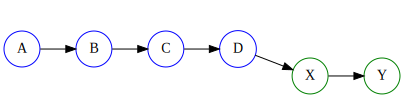

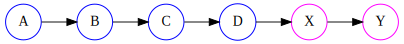

In [132]:
### Este código é para criar o gráfico do ramo, não é necessário para o curso.

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
fast_foward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
fast_foward.node('A', shape='circle', label='A', color='blue')
fast_foward.node('B', shape='circle', label='B', color='blue')
fast_foward.node('C', shape='circle', label='C', color='blue')
fast_foward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
fast_foward.node('X', shape='circle', label='X', color='magenta')
fast_foward.node('Y', shape='circle', label='Y', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
fast_foward.edges(['AB', 'BC', 'CD', 'DX', 'XY'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(fast_foward)

Vamos primeiro verificar se estamos no ramo principal.

In [133]:
!cd notebook_git && git branch --show-current

main


Criamos um novo ramo

In [134]:
!cd notebook_git && git branch branch_fast_forward

Nós mudamos para ele

In [135]:
!cd notebook_git && git switch branch_fast_forward

Cambiado a rama 'branch_fast_forward'


In [136]:
!cd notebook_git && git branch --show-current

branch_fast_forward


Vamos dar uma olhada no tronco

In [137]:
!cd notebook_git && git log --graph --oneline --decorate --all

* 564ccfb (HEAD -> branch_fast_forward, new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


OK, estamos em um ramo criado a partir do ramo principal com todo o seu histórico, fazemos dois novos compromissos

In [138]:
!cd notebook_git && git rm archivo4.py && git commit -am "Eliminado archivo4.py"

rm 'archivo4.py'
[branch_fast_forward 4484e70] Eliminado archivo4.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo4.py


In [139]:
!cd notebook_git && git rm hola.py && git commit -am "Eliminado hola.py"

rm 'hola.py'
[branch_fast_forward 94149fc] Eliminado hola.py
 1 file changed, 3 deletions(-)
 delete mode 100644 hola.py


Fazemos um novo registro para ver que neste novo ramo foram criados

In [140]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, os dois últimos compromissos são os que criamos e podemos verificar se esses compromissos não estão no ramo principal (para isso especifico fazê-lo no ramo "principal").

In [141]:
!cd notebook_git && git log main --graph --oneline --decorate

* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para a filial "principal" para fazer a fusão.

In [142]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Finalmente fazemos a fusão rápida para frente.

In [143]:
!cd notebook_git && git merge --ff-only branch_fast_forward

Actualizando 564ccfb..94149fc
Fast-forward
 archivo4.py | 1 -
 hola.py     | 3 ---
 2 files changed, 4 deletions(-)
 delete mode 100644 archivo4.py
 delete mode 100644 hola.py


A fusão foi feita, vamos ver o que aconteceu com o tronco na filial "principal".

In [144]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como você pode ver, os dois compromissos feitos no `branch_fast_forward_frog_forward_frog foram mantidos.

#### Nenhuma fusão rápida ou verdadeira

Neste caso, criamos um novo ramo, deixamos o ramo principal intocado e modificamos o novo ramo, fazendo vários compromissos. Em seguida, fazemos um compromisso sobre a filial principal. Assim, quando fundimos a nova filial com a principal, veremos um único compromisso na nova filial. Para fazer este tipo de fusão, digitamos `git merge <branch> --no-ff`.

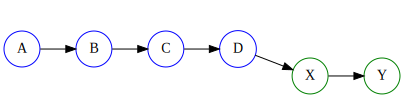

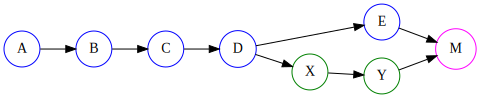

In [145]:
### Este código é para criar o gráfico do ramo, não é necessário para o curso.

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
not_fast_forward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
not_fast_forward.node('A', shape='circle', label='A', color='blue')
not_fast_forward.node('B', shape='circle', label='B', color='blue')
not_fast_forward.node('C', shape='circle', label='C', color='blue')
not_fast_forward.node('D', shape='circle', label='D', color='blue')
not_fast_forward.node('E', shape='circle', label='E', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
not_fast_forward.node('X', shape='circle', label='X', color='green')
not_fast_forward.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
not_fast_forward.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
not_fast_forward.edges(['AB', 'BC', 'CD', 'DE'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])
not_fast_forward.edges(['DX', 'XY', 'YM'])

# Agregar flechas de la rama principal al nodo M
not_fast_forward.edge('E', 'M')

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(not_fast_forward)

Vamos primeiro verificar se estamos no ramo principal.

In [146]:
!cd notebook_git && git branch --show-current

main


Criamos um novo ramo

In [147]:
!cd notebook_git && git branch branch_no_fast_forward

Nós mudamos para ele

In [148]:
!cd notebook_git && git switch branch_no_fast_forward

Cambiado a rama 'branch_no_fast_forward'


In [149]:
!cd notebook_git && git branch --show-current

branch_no_fast_forward


OK, estamos em um ramo criado a partir do ramo principal com todo o seu histórico, fazemos dois novos compromissos

In [150]:
!cd notebook_git && touch file1 && git add file1 && git commit -m "file1"

[branch_no_fast_forward e4e23c9] file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file1


In [151]:
!cd notebook_git && touch file2 && git add file2 && git commit -m "file2"

[branch_no_fast_forward 8df3429] file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file2


Fazemos um novo registro para ver que neste novo ramo foram criados

In [152]:
!cd notebook_git && git log --graph --oneline --decorate

* 8df3429 (HEAD -> branch_no_fast_forward) file2
* e4e23c9 file1
* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, os dois últimos compromissos são os que criamos e podemos verificar se esses compromissos não estão no ramo principal (para isso especifico fazê-lo no ramo "principal").

In [153]:
!cd notebook_git && git log main --graph --oneline --decorate

* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para a filial "principal".

In [154]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Criamos um novo compromisso

In [155]:
!cd notebook_git && touch file3 && git add file3 && git commit -m "file3"

[main 8bdf4d8] file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file3


Por fim, fazemos a fusão "no fast forward".

In [152]:
!cd notebook_git && git merge branch_no_fast_forward --no-ff

ommit. comenzando con '#' serán ignoradas, y un mensaje vacío abortasaria esta># especialmente si esto fusiona un upstream actualizado en una rama de tópico. /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG   [ línea 1/7 (14%), col 1/48 (2%), car 0/301 (0%) ]             [ Párrafo justificado ]...llabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG Modificado

Como podemos ver, ele abre o editor para inserir uma mensagem de compromisso e uma mensagem padrão. Aceitamos a mensagem e vemos o que aconteceu

In [156]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


In [157]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


In [158]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  file1  file2  file3


Como podemos ver, foi criado um novo compromisso com as mudanças do novo ramo no ramo principal.

#### Squash

Neste tipo de fusão, todos os compromissos de um novo ramo são fundidos em um único compromisso no ramo principal, para isto digitamos `git merge <branch> --squash`.

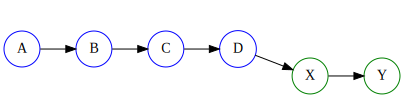

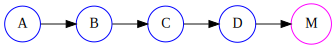

In [159]:
### Este código é para criar o gráfico do ramo, não é necessário para o curso.

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
squash = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
squash.node('A', shape='circle', label='A', color='blue')
squash.node('B', shape='circle', label='B', color='blue')
squash.node('C', shape='circle', label='C', color='blue')
squash.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
squash.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
squash.edges(['AB', 'BC', 'CD', 'DM'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(squash)

Vamos primeiro verificar se estamos no ramo principal.

In [160]:
!cd notebook_git && git branch --show-current

main


Criamos um novo ramo

In [161]:
!cd notebook_git && git branch branch_squash

Nós mudamos para ele

In [162]:
!cd notebook_git && git switch branch_squash

Cambiado a rama 'branch_squash'


In [163]:
!cd notebook_git && git branch --show-current

branch_squash


Vamos dar uma olhada no tronco

In [164]:
!cd notebook_git && git log --graph --oneline --decorate --all

*   274529c (HEAD -> branch_squash, main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


OK, estamos em um ramo criado a partir do ramo principal com todo o seu histórico de troncos, fazemos três novos compromissos

In [165]:
!cd notebook_git && git rm file1 && git commit -am "Eliminado file1"

rm 'file1'
[branch_squash 767b632] Eliminado file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1


In [166]:
!cd notebook_git && git rm file2 && git commit -am "Eliminado file2"

rm 'file2'
[branch_squash a47f771] Eliminado file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file2


In [167]:
!cd notebook_git && git rm file3 && git commit -am "Eliminado file3"

rm 'file3'
[branch_squash 85f8c9f] Eliminado file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file3


Fazemos um novo registro para ver que neste novo ramo foram criados

In [168]:
!cd notebook_git && git log --graph --oneline --decorate

* 85f8c9f (HEAD -> branch_squash) Eliminado file3
* a47f771 Eliminado file2
* 767b632 Eliminado file1
*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, os três últimos compromissos são os que criamos e podemos verificar se esses compromissos não estão no ramo principal (para isso especifico fazê-lo no ramo "principal").

In [169]:
!cd notebook_git && git log main --graph --oneline --decorate

*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para a filial "principal" para fazer a fusão.

In [170]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Fazemos a fusão do squash

In [171]:
!cd notebook_git && git merge branch_squash --squash

Actualizando 274529c..85f8c9f
Fast-forward
Commit de aplastamiento -- no actualizando HEAD
 file1 | 0
 file2 | 0
 file3 | 0
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


A fusão foi feita, vamos ver o que aconteceu com o tronco na filial "principal".

In [172]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As mudanças feitas no ramo não aparecem, vamos fazer um "status de crédito".

In [173]:
!cd notebook_git && git status

En la rama main
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        file1
	borrados:        file2
	borrados:        file3



Vemos que temos que nos comprometer com a fusão. Isto porque o idiota não sabe que mensagem colocar nela e deixa a nós a responsabilidade de fazê-lo, então nós o fazemos.

In [174]:
!cd notebook_git && git commit -m "Merge squash de los commits de la rama branch_squash"

[main 52acb97] Merge squash de los commits de la rama branch_squash
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


Nós refizemos um "log".

In [175]:
!cd notebook_git && git log --graph --oneline --decorate

* 52acb97 (HEAD -> main) Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Conflitos de fusão

Ao fundir filiais, pode acontecer que o mesmo arquivo tenha sido modificado em várias filiais. Isto pode ser normal em projetos onde várias pessoas estão se desenvolvendo, então vamos ver como consertá-lo.

#### Criamos um conflito

Verificamos que estamos no ramo "principal".

In [176]:
!cd notebook_git && git branch --show-current

main


Criamos um novo ramo a partir deste

In [177]:
!cd notebook_git && git branch rama_con_conflicto

Acrescentamos uma linha ao arquivo `file1.py`, lembrando que estamos no ramo `main`.

In [178]:
!cd notebook_git && echo "print('rama main')" >> archivo1.py

In [179]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')


file1.py` é modificado, nós fazemos um compromisso

In [180]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama main"

[main 53f909b] archivo1.py en rama main
 1 file changed, 1 insertion(+)


Agora vamos ao ramo `branch_with_conflict` e acrescentamos uma nova linha para `file1.py`.

In [181]:
!cd notebook_git && git switch rama_con_conflicto

Cambiado a rama 'rama_con_conflicto'


In [182]:
!cd notebook_git && git branch --show-current

rama_con_conflicto


In [183]:
!cd notebook_git && echo "print('rama rama_con_conflicto')" >> archivo1.py

In [184]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama rama_con_conflicto')


Como podemos ver, o `file1.py` não é o mesmo no ramo `main` e no ramo `branch_with_conflict`. Comprometemos a modificação do `file1.py` para o ramo `branch_with_conflict`.

In [185]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama rama_con_conflicto"

[rama_con_conflicto 32851c3] archivo1.py en rama rama_con_conflicto
 1 file changed, 1 insertion(+)


Voltar para o ramo "principal".

In [186]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


In [187]:
!cd notebook_git && git branch --show-current

main


Fundimos o ramo `branch_with_conflict`.

In [188]:
!cd notebook_git && git merge rama_con_conflicto

Auto-fusionando archivo1.py
CONFLICTO (contenido): Conflicto de fusión en archivo1.py
Fusión automática falló; arregle los conflictos y luego realice un commit con el resultado.


Ao fazer a fusão, já estamos avisados de que existe um conflito no `file1.py` e que a fusão não poderia ser feita. Fazemos um "status de idiota".

In [189]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Ele nos diz a mesma coisa, mas nos dá mais informações, nos diz que podemos abortar a fusão com a "git merge --abort". Mas vamos consertar isso ao invés disso

#### Solução de um conflito

Em nosso caso, sabemos onde está o problema, mas caso não saibamos, utilizando a "diferença", podemos encontrar o problema.

In [190]:
!cd notebook_git && git diff archivo1.py

diff --cc archivo1.py
index 8b4bf58,b5c003c..0000000
--- a/archivo1.py
+++ b/archivo1.py
@@@ -1,2 -1,2 +1,6 @@@
  print('Este es el archivo 1')
++<<<<<<< HEAD
 +print('rama main')
++=======
+ print('rama rama_con_conflicto')
++>>>>>>> rama_con_conflicto


git diff está nos dizendo que o problema está na última linha. A versão do arquivo do ramo `HEAD` (onde estamos atualmente `main`) tem `impressão('ramo principal')` na última linha, enquanto a versão do ramo `branch_with_conflict` tem `impressão('ramo_with_conflict')` na última linha. Portanto, você tem que abrir o arquivo com qualquer editor e consertar isso.

Depois de editar o arquivo com meu editor de código, removi todas as linhas extras e parece assim

In [192]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')

Agora fazemos um "status de idiota" para ver o que precisamos fazer.

In [193]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Ele nos diz que temos o arquivo `file1.py` com modificações, então o adicionamos à área `staged` e depois o comprometemos.

In [194]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py con el merge resuelto"

[main 679bb49] archivo1.py con el merge resuelto


Fazemos novamente um "status de idiota" para ver se foi resolvido.

In [195]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Parece estar resolvido, nós fazemos um "registro de crédito" para verificá-lo.

In [196]:
!cd notebook_git && git log --graph --oneline --decorate

*   679bb49 (HEAD -> main) archivo1.py con el merge resuelto
|\  
| * 32851c3 (rama_con_conflicto) archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Remover galhos

A idéia de um ramo é abri-lo para desenvolver uma nova funcionalidade ou característica de uma forma que não afete o resto da equipe de desenvolvimento. Assim, quando isso é conseguido, ele é fundido com o ramo principal. Portanto, após a fusão não faz mais sentido manter a filial, então ela tem que ser removida, mas será feita de uma maneira diferente se a filial tiver sido fundida ou não com a filial principal.

#### Eliminar as filiais que foram fundidas (`git branch -d <branch>`)

Para eliminar um ramo que já foi fundido no ramo principal, basta fazer `git branch -d <branch>` ou `git branch --delete <branch>`. Vamos apagar a última filial que criamos e fundimos

In [197]:
!cd notebook_git && git branch -d rama_con_conflicto

Eliminada la rama rama_con_conflicto (era 32851c3).


Se agora listarmos todos os ramos, podemos ver que não teremos mais "ramo_com_conflito".

In [198]:
!cd notebook_git && git branch

  branch_fast_forward
  branch_no_fast_forward
  branch_squash
* main
  new_branch
  new_branch2


#### Remover ramos que não foram fundidos com o ramo principal (`git brnach -D <branch>`)

Se tentarmos fazer o mesmo que antes com um ramo que nunca foi fundido com outro ramo, teremos um erro.

Vamos criar uma nova filial, comprometê-la e não fundi-la.

In [199]:
!cd notebook_git && git branch branch_sin_fusion

In [200]:
!cd notebook_git && git switch branch_sin_fusion

Cambiado a rama 'branch_sin_fusion'


In [201]:
!cd notebook_git && touch file4 && git add file4 && git commit -m "file4"

[branch_sin_fusion 9506b0a] file4
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file4


In [202]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Com tudo o que aprendemos até agora, podemos ver que o que fizemos foi criar uma nova filial, mudar para ela, criar um novo arquivo, comprometê-la e voltar para a filial "principal". Agora vamos tentar apagar esta nova ramificação

In [203]:
!cd notebook_git && git branch -d branch_sin_fusion

error: La rama 'branch_sin_fusion' no ha sido fusionada completamente.
Si estás seguro de querer borrarla, ejecuta 'git branch -D branch_sin_fusion'.


Como podemos ver, isso nos diz que a `branch_sin_fusion` não foi fundida, portanto não foi removida e que, se temos certeza de removê-la, temos que fazer a `git branch -D branch_sin_fusion`, portanto fazemos isso para removê-la.

In [204]:
!cd notebook_git && git branch -D branch_sin_fusion

Eliminada la rama branch_sin_fusion (era 9506b0a).


Agora foi removido

## Trabalhando com repositórios remotos

Quando desenvolvemos software, normalmente não o fazemos sozinhos, normalmente trabalhamos em equipe, portanto não faz sentido ter um repositório local de git, mas ter um repositório remoto com o qual todos nós trabalhamos e compartilhamos nosso progresso.

 > Nota: O objetivo deste post é explicar a idiotice. Para a conexão com repositórios remotos vou explicar com GitHub porque é o serviço de hospedagem de repositório de git mais utilizado, mas não vou entrar profundamente no GitHub.

### Clonar um repositório remoto (`git clone <repositório>`)

Se começarmos a trabalhar em um repositório que já foi criado, a primeira coisa que temos que fazer é cloná-lo, para isso temos que fazer `git clone <repositório>`, onde `<repositório>` pode ser uma URL ou um endereço SSH. Como neste momento todo o tópico de grnades modelo de linguagem e ChatGPT está muito na moda, vamos clonar um repositório de código aberto criado pela comunidade, [Open-Assistant](https://github.com/LAION-AI/Open-Assistant), para isso vamos fazer `git clone https://github.com/LAION-AI/Open-Assistant`.

In [11]:
!git clone https://github.com/LAION-AI/Open-Assistant.git

Clonando en 'Open-Assistant'...
remote: Enumerating objects: 29769, done.
remote: Counting objects: 100% (673/673), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 29769 (delta 398), reused 577 (delta 354), pack-reused 29096
Recibiendo objetos: 100% (29769/29769), 33.61 MiB | 29.29 MiB/s, listo.
Resolviendo deltas: 100% (19967/19967), listo.


Isto cria a pasta 'Open-Assistant' com todo o código do repositório, podemos entrar e ver todo o código.

In [13]:
!cd Open-Assistant && ls

ansible		 deploy		      model	      safety
assets		 discord-bots	      notebooks       scripts
backend		 docker		      oasst-data      setup.cfg
CODEOWNERS	 docker-compose.yaml  oasst-shared    text-frontend
CONTRIBUTING.md  docs		      pyproject.toml  website
copilot		 inference	      README.md
data		 LICENSE	      redis.conf


Eu excluo a pasta

In [ ]:
!rm -r Open-Assistant

### Ligando um repositório local a um repositório remoto

Se for ao contrário, se começarmos a nos desenvolver localmente e depois queremos sincronizá-lo com um repositório remoto, temos que fazer o seguinte

 * Primeiro criei um repositório remoto vazio, no meu caso criei o repositório 'notebook_git' no GitHub, que mais tarde apagarei.
 * Obter a URL do repositório, ou endereço SSH
 * Sincronize-os utilizando `git remoto adicionar origem <URL>.

O repositório vazio que criei no GitHub se parece com isto

![notebook git repo](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo.png)

No meu caso, utilizarei o endereço SSH que é `git@github.com:maximofn/notebook_git.git'.

In [205]:
!cd notebook_git && git remote add origin git@github.com:maximofn/notebook_git.git

Eles já estão ligados, mas para ter certeza de que podemos fazer `git remoto -v`.

In [206]:
!cd notebook_git && git remote -v

origin	git@github.com:maximofn/notebook_git.git (fetch)
origin	git@github.com:maximofn/notebook_git.git (push)


### Carregando mudanças de um repositório local para um repositório remoto (`git push`)

Como dissemos, eles estão ligados, mas se eu for ao meu repositório no GitHub, ainda assim parece o seguinte

![notebook git repo](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo.png)

O repositório local e remoto estão ligados, mas agora precisamos empurrar todas as mudanças do repositório local para o repositório remoto, então devemos utilizar `git push origem <filial local>:<filial remoto>`, ou seja, como nossa filial principal é chamada de `main` e a filial principal no GitHub é chamada de `main`, devemos fazer `git push origem principal:principal`.
Se você se lembra que o GitHub não chama a filial principal de `master`, mas o GitHub não chama a filial principal de `main`, então se todos em seu repositório local chamam suas filiais de uma maneira, você tem que especificar qual filial localmente escreve para qual filial remotamente.

Você pode configurar a conexão padrão entre as filiais em git fazendo `git push --set-upstream origin main`. Isto estabelece uma relação entre a filial local "principal" e a filial remota "principal". Uma vez estabelecida esta relação, você só precisa fazer o "git push" para carregar as mudanças feitas localmente no servidor remoto.

Assim, estabelecemos a conexão entre as filiais

In [207]:
!cd notebook_git && git push --set-upstream origin main

Enumerando objetos: 51, listo.
Contando objetos: 100% (51/51), listo.
Compresión delta usando hasta 12 hilos
Comprimiendo objetos: 100% (38/38), listo.
Escribiendo objetos: 100% (51/51), 4.21 KiB | 2.11 MiB/s, listo.
Total 51 (delta 18), reusado 0 (delta 0)
remote: Resolving deltas: 100% (18/18), done.
To github.com:maximofn/notebook_git.git
 * [new branch]      main -> main
Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Agora podemos simplesmente "empurrar" as mudanças locais para o repositório remoto.

In [208]:
!cd notebook_git && git push

Everything up-to-date


Se agora voltarmos ao nosso repositório GitHub, parece que

![notebook git repo push](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_push.png)

Se fizermos um `ls' em nosso repositório local, podemos ver que os arquivos que temos no repositório remoto estão no repositório local, ou seja, sincronizamos o repositório local com o remoto.

In [209]:
!cd notebook_git && ls -a

.  ..  api_keys.py  archivo1.py  archivo2.py  archivo8.py  .git  .gitignore


Os únicos que não estão no repositório remoto são `api_keys.py`, que é o que adicionamos ao arquivo `.gitignore`, ou seja, aquele que dissemos ao gitignore para não seguir. E `.git` que é onde está a configuração de nosso repositório local, e que não precisa ser carregado no repositório remoto, porque cada pessoa terá sua própria configuração de git e, portanto, não precisa ser sincronizada.

#### Baixar mudanças de um repositório remoto para um repositório local (`git pull`)

Agora vamos fazer o contrário, vamos fazer o download das novas mudanças que foram feitas no repositório remoto. Se olharmos para o repositório remoto, podemos ver que existe um botão "Adicionar ao README", então clicamos nele para adicioná-lo.

![notebook git repo push](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_push.png)

Ao clicar nele, um editor abrirá, deixará o que GitHub colocou e salvará as mudanças, clicando no botão `Comprometer mudanças...`.

![noteboot git repoot repo readme](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_readme.png)

Uma janela irá aparecer pedindo uma mensagem de compromisso, deixe a mensagem padrão e clique em `Mudanças de Compromisso`.

![mensagem de compromisso do git git repo do notebook](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_commit_message.png)

Ao fazer isso, o repositório terá a seguinte aparência

![notebook git repo pull](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_pull.png)

Um novo arquivo chamado `README.MD` foi criado, mas se o fizermos no repositório local, não o encontraremos.

In [10]:
!cd notebook_git && ls | grep README

Portanto, precisamos puxar as mudanças do repositório remoto para o repositório local, para fazer isso precisamos fazer `git pull origin <remote branch>` para dizer ao git em que ramo remoto vamos puxar os dados, mas como antes podemos estabelecer uma relação entre a filial remota e a filial local como "filial da git --set-upstream-to=origin/<local branch>>>>remote branch>", mas como nossa filial local é chamada "principal" e a filial remota é chamada "principal" por GitHub, devemos mudar o acima para "filial da git --set-upstream-to=origin/main main".

Uma vez feito isso, para baixar as novas mudanças do repositório remoto para o repositório local, basta fazer `git pull`.

Vamos estabelecer a relação entre as filiais com "filial --set-upstream-to=origin/main main".

In [210]:
!cd notebook_git && git branch --set-upstream-to=origin/main main

Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Agora podemos puxar as mudanças do repositório remoto para o repositório local com `git pull`.

In [211]:
!cd notebook_git && git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Desempaquetando objetos: 100% (3/3), 646 bytes | 646.00 KiB/s, listo.
Desde github.com:maximofn/notebook_git
   679bb49..527e07a  main       -> origin/main
Actualizando 679bb49..527e07a
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


Como podemos ver, diz 'README.md' foi adicionado, nós o verificamos fazendo 'ls'.

In [212]:
!cd notebook_git && ls | grep README

README.md


Temos o arquivo localmente

### Sincronizar filiais remotas e locais

Como vimos, tivemos que sincronizar as filiais remotas e locais a fim de carregar e baixar os dados, porém, se primeiro criarmos o repositório no GitHub e depois cloná-lo, esta sincronização não é mais necessária.

## Pseudônimos

Toda vez que quisemos fazer um log, utilizamos este comando `git log --graph --oneline --decorate`, no entanto, lembrar este comando é bastante complicado, na verdade eu não me lembro, toda vez que eu queria utilizá-lo eu tinha que procurá-lo porque eu não me lembrava, então seria bom ter uma maneira de abreviá-lo.

Para este git oferece `alias`, assim você pode criar alias para os comandos que quiser, para isto você tem que fazer `git config --global alias.<nome da serie> "comando"`.

Portanto, vamos chamar de `git tree` ao comando `git log --graph --oneline --decorate`, pois nos permite ver a história, ramificação e fusão de ramos como se fosse o crescimento de uma árvore, então fazemos `git config --global alias.tree "log --graph --oneline --decorate"`.

 > Importante**: Não colocar a palavra `git` dentro do comando.

In [218]:
!git config --global alias.tree "log --graph --oneline --decorate"

Se agora formos ao nosso repositório e fizermos `git tree`, veremos a história como fizemos antes.

In [217]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, origin/main) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, nosso pseudônimo foi criado

### Aliases de comandos de git existentes

Você pode criar pseudônimos para comandos que já existem em git, na verdade, é uma prática que muita gente usa, especialmente para estenografia, então vamos fazer um. Vamos fazer um pseudônimo do comando `git status` e renomeá-lo `git st` como `git config --global alias.st "status"`.

In [219]:
!git config --global alias.st "status"

Nós o testamos agora

In [220]:
!cd notebook_git && git st

En la rama main
Tu rama está actualizada con 'origin/main'.

nada para hacer commit, el árbol de trabajo está limpio


Já temos o comando "status de status simplificado" para "status de status simplificado".

### Aliases de comando não-git

Podemos criar alias para comandos não git, por exemplo, porque achamos que o git precisa desse novo comando, é feito da mesma maneira, exceto que o comando tem que ser precedido por `!`, ou seja, seria `git config --global alias.<nome da serie> "!comando"`.

Quando vimos os conflitos, vimos que o git nos disse onde eles estavam, mas para resolvê-los temos que editar o código nós mesmos, para que possamos criar um alias git para que possamos abrir um arquivo com o editor de texto que queremos, no meu caso vou criar um alias que abrirá os arquivos com `vscode` para que eu tenha que fazer `git config --global alias.code "!code"`.

In [222]:
!git config --global alias.code "!code"

Nós o testamos

In [223]:
!cd notebook_git && git code README.md

Depois de fazer isso, abri o `README.md` em `vscode`.

#### Lista com todos os pseudônimos

Caso não nos lembremos dos pseudônimos que criamos, podemos ver a configuração global do git, mas como isso pode ser um pouco avassalador porque nos dá muita informação, podemos filtrá-la para nos mostrar apenas os pseudônimos que criamos, para isso utilizamos `git config --get-regexp ^aliases'.

In [224]:
!git config --get-regexp ^alias\.

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code


Conseguimos o alais que criamos

Mas ainda melhor, podemos criar um pseudônimo para obter os pseudônimos, então fazemos `git config --global alias.alias "config --get-regexp ^alias".

In [225]:
!git config --global alias.alias "config --get-regexp ^alias\."

Se agora fizermos `git alias`

In [226]:
!git alias

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code
alias.alias config --get-regexp ^alias\.


Recebemos a lista com todos os nossos pseudônimos

## Stash store (`git stash`)

Digamos que estamos trabalhando em uma filial, temos vários arquivos modificados, não os comprometemos, e por qualquer razão temos que mudar para outra filial. Por exemplo, estamos em uma filial desenvolvendo uma nova funcionalidade, e temos que deixá-la a meio caminho porque há um bug crítico na filial principal.

Uma solução seria assumir um compromisso para salvar as mudanças e voltar mais tarde. Mas talvez tenhamos deixado o código meio feito e não queiramos comprometê-lo. Então é por isso que o armazenamento foi inventado, que é como um armazenamento, onde você deixa seu código armazenado para que possa recuperá-lo mais tarde.

É uma pilha, o que significa que a última coisa a entrar é a primeira a sair.

Vamos ver como fazer isso, primeiro criamos um novo ramo que chamaremos de `nova_função'.

In [2]:
!cd notebook_git && git branch new_feature

Nós mudamos para ele

In [3]:
!cd notebook_git && git switch new_feature

Cambiado a rama 'new_feature'


Vamos modificar `file2.py` e `file8.py`.

In [4]:
!cd notebook_git && echo "print('new_feature')" >> archivo2.py && echo "print('new_feature')" >> archivo8.py

Fazemos um "status de crédito" para verificar se eles foram alterados

In [5]:
!cd notebook_git && git status

En la rama new_feature
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py
	modificados:     archivo8.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Vamos colocar o "arquivo 8.py" na área de "faseados".

In [6]:
!cd notebook_git && git add archivo8.py

Nós refizemos um "status de crédito".

In [7]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	modificados:     archivo8.py

Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py



Como podemos ver, temos dois arquivos modificados, um dos quais também está na área "faseada". Se mudássemos de filial agora, para evitar a perda das mudanças, poderíamos ou comprometê-las, ou salvá-las para o "armazenamento", então vamos fazer o último utilizando o "armazenamento".

In [8]:
!cd notebook_git && git stash

Directorio de trabajo y estado de índice WIP on new_feature: 527e07a Create README.md guardados


Se voltarmos a fazer o "status de idiota", vamos ver o que acontece.

In [9]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Os arquivos com modificações não aparecem mais, é como se tivéssemos feito um compromisso.

 > Importante**: Arquivos recém-criados, que nunca foram rastreados pelo git não irão para o repositório, então com novos arquivos é necessário pelo menos fazer um `git add` primeiro.

Se eu agora criar um novo arquivo e tentar levá-lo para o armazém, isso me dará um erro.

In [16]:
!cd notebook_git && touch archivo9.py

In [11]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [13]:
!cd notebook_git && git stash

No hay cambios locales para guardar


In [14]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como podemos ver, o "arquivo 9.py" não o salvou no repositório, por isso deveria ter sido adicionado com o "git add".

In [15]:
!cd notebook_git && rm archivo9.py

### Tudo para o esconderijo (`git stash -u -a`)

Como vimos, somente os arquivos que o git está rastreando são enviados para a loja, mas se tivermos novos arquivos criados, ou arquivos ignorados, eles não serão enviados, então para trabalhar em torno disso podemos utilizar as bandeiras "u" ou "-incluir - não rastreado" para enviar novos arquivos que o git ainda não rastreou, e a bandeira "a" ou "-tudo" para incluir tudo, inclusive arquivos ignorados.

#### Lista de esconderijos (`lista de esconderijos`)

Como dissemos, o esconderijo funciona como uma pilha, portanto, se utilizarmos este esconderijo muitas vezes, teremos de fato uma lista de esconderijos, e para ver quais esconderijos temos, podemos utilizar "lista de esconderijos".

In [17]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


Como podemos ver, temos apenas um, que indica o ramo (`em nova_característica'), o último compromisso (`Criar README.md') e um identificador (`527e07a').

#### Loja com descrição (`git stash push -m <descrição>)`)

Como vimos, a lista devolve o ramo e o último compromisso, mas esta informação só é útil para saber de onde começamos a modificar antes de salvar na história. Ela também retorna um identificador que não nos diz muito, de modo que podemos adicionar uma primeira descrição ao esconderijo com `git stash push -m <descrição>`.

Primeiro fazemos um "status de idiota" para ver o que temos sem nos comprometermos.

In [18]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Temos 'file9.py', mas lembre-se que nunca foi rastreado por git, então para incluí-lo em um stash temos que utilizar a bandeira 'u' ou a bandeira 'a', então criamos um novo stash com uma descrição com o comando 'git stash push -u -m <description>'.

In [28]:
!cd notebook_git && git stash push -u -m "archivo9.py"

Directorio de trabajo y estado de índice On new_feature: archivo9.py guardados


Retirámos a lista de estoque

In [29]:
!cd notebook_git && git stash list

stash@{0}: On new_feature: archivo9.py
stash@{1}: WIP on new_feature: 527e07a Create README.md


O novo aparece muito mais claramente

### Recuperar o último esconderijo (`git stash pop`)

Como já dissemos, o estoque é uma pilha com lojas, então quando se trata de recuperá-las, o faremos da mesma forma que uma pilha, sempre recuperando a última.

![git stash stash push pop](https://maximofn.com/wp-content/uploads/2023/04/git-stash-push-pop.png)

Para recuperar o último esconderijo, temos de fazer 'git stash pop'.

Primeiro, fazemos um "status de crédito" para ver que não temos nenhuma mudança pendente.

In [30]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Agora recuperamos o último esconderijo

In [31]:
!cd notebook_git && git stash pop

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py

Descartado refs/stash@{0} (0246b0e922f654e7fc68cfeaf26e24fc511feb37)


Se fizermos o status de idiota novamente, veremos que temos `file9.py` pending commit again.

In [32]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



E, se verificarmos a lista de estoque, só nos resta um estoque.

In [33]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


#### Apagar um esconderijo (`git stash drop <position>`)

Se quisermos excluir um esconderijo, temos que fazer ``git stash drop<position>` onde `<position>` é a posição do esconderijo na lista.

Recebemos a lista do esconderijo

In [34]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


Em nosso caso só temos um e na posição 0 (`stash@{0}`), então para removê-lo teríamos que fazer `git stash drop 0`, porém não vou fazer isso porque vou removê-lo mais tarde com outro comando

#### Remover todos os esconderijos (`git stash clear`)

Se quisermos limpar toda a lista de estoque, temos que fazer "limpar o estoque".

In [35]:
!cd notebook_git && git stash clear

Se agora pedirmos a lista de estoque

In [36]:
!cd notebook_git && git stash list

Não recebemos nada porque eliminamos todos

Vamos deixar tudo como estava, fazer um "status de idiota" para lembrar as mudanças que tínhamos pendentes.

In [37]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



Vemos que estamos na ramificação "nova_função" e que temos `file9.py` pendente de um compromisso, já que o criamos para o exemplo, o apagamos e voltamos para a ramificação principal.

In [39]:
!cd notebook_git && git reset archivo9.py

In [41]:
!cd notebook_git && rm archivo9.py

In [42]:
!cd notebook_git && git switch main

Cambiado a rama 'main'
Tu rama está actualizada con 'origin/main'.


## Etiquetas

Quando estamos desenvolvendo código, surgem momentos em que geramos versões, por exemplo `v1.1`, `v1.2`, etc. Para manter isto sob controle, o git nos fornece etiquetas.

### Criar nova tag (`git tag -a <tag_name> -m "<message>"`)

Para criar uma tag temos que fazer `git tag -a <tag_name> -m "<message>"`.

Por exemplo, vamos criar uma tag na versão atual do repositório, para isso vou fazer `git tag -a v_tag -m "Tag com o repositório na parte final, onde explicamos as tags"`.

In [1]:
!cd notebook_git && git tag -a v_tag -m "Tag con el repositorio en la parte final, en la que explicamos los tags"

### Lista de tags (`git tag`)

Para ver as tags que criamos, podemos fazer `git tag`.

In [2]:
!cd notebook_git && git tag

v_tag


### Criar uma tag a partir de um compromisso antigo (`git tag -a <tag_name> -m "<message>" <hash>`)

Vamos fazer uma "árvore de git" para ver a história

In [3]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Embora não diga isso na descrição, quando fizemos o commit `4bb9d75` foi quando terminamos a parte de controle de versão localmente, então também seria bom ter uma etiqueta a partir daquele momento. Para fazer isso, o que precisamos fazer é criar uma tag adicionando o hash daquele ponto no tempo

In [4]:
!cd notebook_git && git tag -a v_local -m "Tag con el repositorio en la parte de control de versiones de manera local" 4bb9d75

Se agora fizermos uma lista das etiquetas, a nova aparece.

In [5]:
!cd notebook_git && git tag

v_local
v_tag


E se olharmos para a história do compromisso

In [8]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


No ponto da história onde criamos a tag, agora vemos a tag que criamos `* 4bb9d75 (tag: v_local, new_branch) Compromisso com o arquivo 7`.

### Alternando entre as tags (`git reset --hard <tag>` ou `git reset --soft <tag>`)

Assim como podemos nos movimentar entre compromissos na história, também podemos nos movimentar entre etiquetas. Isto tem a vantagem de que podemos nos mover para outro ponto da história sem ter que conhecer o hash, sabendo o nome da tag que estabelecemos naquele momento, podemos nos mover simplesmente fazendo `git reset --hard <tag>` ou `git reset --soft <tag>`.

Primeiro vamos fazer um `ls' para ver quais arquivos temos

In [6]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  README.md


Fazemos uma `árvore de git` também para ver onde estamos em nossa história.

In [7]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora mudamos para o ponto onde criamos a tag `v_local` utilizando `git reset --hard v_local`.

In [10]:
!cd notebook_git && git reset --hard v_local

HEAD está ahora en 4bb9d75 Commit con el archivo 7


Se agora refizermos um `ls', vemos que não temos os mesmos arquivos.

In [11]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Se olharmos também para a história, podemos ver que mudamos o momento da história

In [12]:
!cd notebook_git && git tree

* 4bb9d75 (HEAD -> main, tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Para voltar ao último ponto da história no tempo, como também criamos uma etiqueta, será suficiente fazer `git reset --hard v_tag'.

In [13]:
!cd notebook_git && git reset --hard v_tag

HEAD está ahora en 527e07a Create README.md


Olhamos novamente para a história para verificar se estamos de volta ao último momento da história.

In [14]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py
